# Analysis of Twitter Data

## Generating Word Cloud From Twitter Feed 
First, we need to install these additional modules: wordcloud and scipy
 
Note that you can try the following steps:
 * Start "Anaconda Prompt"
 * Run the command "`anaconda search -t conda wordcloud`" to search for packages on anaconda.org
 * Run the command "`conda install -c conda-forge wordcloud=`_`version`_" to install wordcloud

Next, we will need to read all tweets into a DataFrame.

In [1]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

#tweets_data_path = 'C:\\Program Files\\Anaconda2\\tweets_bigData_dataAnalytic.json'
tweets_data_path = 'all_tweet.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        if (line == '\n'):      # skip empty lines
            continue
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print(e)
        continue
print(f"\n{count} tweets read.")
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet.get('text', None), tweets_data))
tweets.head(5)

......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......

,text
0,@MisterHeartz ในดีค้าบ
1,RT @MisterHeartz: ฝัมดีจ้า
2,RT @withpeachy: เราซื้อที่ @koriico นะคะ ใครอย...
3,RT @withpeachy: — Heimish Hydrogel Eye Patch B...
4,RT @KIKI48_xx: สำหรับคนที่ถามเรื่องออกกำลังกาย...


Create the word cloud as follows:

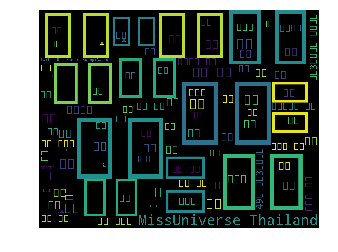

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words = ' '.join(tweets['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                           ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      max_words=100,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

Change the rear mask..

/home/pattaraph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


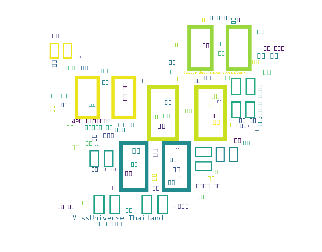

In [3]:
from scipy.misc import imread

logomask = imread('twitter_mask.png')

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=100,
                      mask = logomask,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
plt.show()